In [1]:
import torch

In [5]:
x = torch.empty(1)
print("Empty tensor(1):",{x})
x=torch.empty(3)
print("Empty tensor(3):",x)
x=torch.empty(2,3)
print("Empty tensor(2,3):",x)
x=torch.empty(2,2,3)
print("Empty tensor(2,2,3):",x)
x= torch.rand(2,2)
print("Random tensor(2,2):",x)
x=torch.zeros(2,2)
print("Zero tensor(2,2):",x)


Empty tensor(1): {tensor([0.])}
Empty tensor(3): tensor([-1.7817e-38,  1.8091e-42,  0.0000e+00])
Empty tensor(2,3): tensor([[-1.7817e-38,  1.8091e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])
Empty tensor(2,2,3): tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
Random tensor(2,2): tensor([[0.0871, 0.9993],
        [0.5475, 0.8571]])
Zero tensor(2,2): tensor([[0., 0.],
        [0., 0.]])


In [11]:
print("size of x:",x.size())
print("shape of x:",x.shape)

size of x: torch.Size([2, 2])
shape of x: torch.Size([2, 2])


In [16]:
print(x.dtype)

# specify the data type
x = torch.zeros(2,2, dtype=torch.int8)

print(x)

print("x dtype:",x.dtype)

torch.int8
tensor([[0, 0],
        [0, 0]], dtype=torch.int8)
x dtype: torch.int8


In [25]:
x[0 , 0] = 127
print(x)

tensor([[127,   0],
        [  0,   0]], dtype=torch.int8)


In [28]:
x[0 , 0] = 128
print(x)

RuntimeError: value cannot be converted to type int8_t without overflow

In [31]:
x= torch.tensor([2.5, 0.1])
print(x,x.dtype)

tensor([2.5000, 0.1000]) torch.float32


In [32]:
# requires_grad argument
# tell pytorch that it will need to calculate the gradients for this tensor
x = torch.tensor([2.5, 0.1], requires_grad=True)
print(x)

tensor([2.5000, 0.1000], requires_grad=True)


**Operations with Tensors**

In [33]:
x = torch.ones(2,2)
y = torch.rand(2,2)

# elementwise addition
z = x + y
# or z = torch.add(x,y)
# or y.add_(x) # in place addition
print(x)
print(y)
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0.1663, 0.7182],
        [0.7050, 0.0905]])
tensor([[1.1663, 1.7182],
        [1.7050, 1.0905]])


In [35]:
z = x - y
print(z)

z = x * y
print(z)

z = x / y
print(z)

tensor([[0.8337, 0.2818],
        [0.2950, 0.9095]])
tensor([[0.1663, 0.7182],
        [0.7050, 0.0905]])
tensor([[ 6.0121,  1.3923],
        [ 1.4185, 11.0448]])


In [37]:
# slicing similar to numpy
x = torch.rand(5,3)
print(x)
print(x[:,0])
print(x[1,:])
print(x[1,1])
print(x[1,1].item())

tensor([[0.5611, 0.4563, 0.9026],
        [0.5270, 0.4313, 0.0749],
        [0.8446, 0.4879, 0.5534],
        [0.1115, 0.8995, 0.4463],
        [0.2393, 0.5218, 0.4788]])
tensor([0.5611, 0.5270, 0.8446, 0.1115, 0.2393])
tensor([0.5270, 0.4313, 0.0749])
tensor(0.4313)
0.43127208948135376


In [39]:
# reshape with torch.view()

x= torch.rand(4,4)
y = x.view(16)
z = x.view(-1,8) # the size -1 is inferred from other dimensions

print(x.size(),y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [41]:
# when working on the cpu object will share the same memory location
import numpy as np

a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [46]:

c = torch.tensor(b) # this will not share the memory location
# c = torch.from_numpy(b) # this will share the memory location
print(b)
print(c)

c.add_(1)

print(b)
print(c)

[3. 3. 3. 3. 3.]
tensor([3., 3., 3., 3., 3.])
[3. 3. 3. 3. 3.]
tensor([4., 4., 4., 4., 4.])


**Gpu Support**

In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
print(a.device)
a = a.to(device)
print(a.device)

cuda
cpu
cuda:0


In [53]:
x = torch.ones(5, device=device)
print(x,x.device)

tensor([1., 1., 1., 1., 1.], device='cuda:0') cuda:0


**Autograd**
$\\$ provide automatique differenetiation for all operations on Tensors

In [66]:
x = torch.rand(3,device=device,requires_grad=True)
y= x+2
print(x)
print(y)
print(y.grad_fn)


tensor([0.0261, 0.1917, 0.5286], device='cuda:0', requires_grad=True)
tensor([2.0261, 2.1917, 2.5286], device='cuda:0', grad_fn=<AddBackward0>)


In [68]:
z = y*y*3
print(z)
z = z.mean()
print(z)

tensor([12.3154, 14.4100, 19.1818], device='cuda:0', grad_fn=<MulBackward0>)
tensor(15.3024, device='cuda:0', grad_fn=<MeanBackward0>)


In [69]:
print(x.grad)
z.backward()
print(x.grad) # dz/dx

None
tensor([4.0522, 4.3833, 5.0572], device='cuda:0')


In [71]:
# when calling backward() it accumulates the gradient in the .grad attribute
print(z)

tensor(15.3024, device='cuda:0', grad_fn=<MeanBackward0>)


**Stop a tensor from tracking history**

In [72]:
# .requires_grad_( ... ) changes an existing Tensor’s requires_grad flag in-place. The input flag defaults to False if not given.
a = torch.randn(2,2)

b = (a*a).sum()
print(a.requires_grad)
print(b.grad_fn)

a.requires_grad_(True)
b= (a*a).sum()
print(a.requires_grad)
print(b.grad_fn)

False
None
True


In [74]:
# .detach(): get a new Tensor with the same content but no gradient computation
a = torch.randn(2,2, requires_grad=True)
b = a.detach()
print(a.requires_grad)
print(b.requires_grad)

True
False


In [75]:
# Wrap in ' with torch.no_grad(): ' to prevent tracking history in autograd

a = torch.randn(2,2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    b= (a*2)
    print(b.requires_grad)

True
False


**Gradient Descent Autograd**$\\$
Linear regression example :
$$
f(x) = w * x +b
$$

In [80]:
X = torch.tensor([1.0, 2.0, 3.0, 4.0],dtype=torch.float32)
Y = torch.tensor([2.0, 4.0, 6.0, 8.0],dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w*x

# loss = MSE
def loss(y_pred,y):
    return ((y_pred-y)**2).mean()

X_test = 5.0

print(f'Prediction before training: f(5) = {forward(X_test).item():.3f}')

Prediction before training: f(5) = 0.000


In [81]:
# Training
learning_rate = 0.01
n_epochs = 100

for epoch in range(n_epochs):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l = loss(y_pred,Y)

    # gradients = backward pass
    l.backward()

    # update weights
    with torch.no_grad():
        w -= learning_rate*w.grad

    # zero gradients
    w.grad.zero_()

    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')
print(f'Prediction after training: f(5) = {forward(X_test).item():.3f}')

epoch 10: w = 1.606, loss = 1.60939169
epoch 20: w = 1.922, loss = 0.06237914
epoch 30: w = 1.985, loss = 0.00241778
epoch 40: w = 1.997, loss = 0.00009371
epoch 50: w = 1.999, loss = 0.00000363
epoch 60: w = 2.000, loss = 0.00000014
epoch 70: w = 2.000, loss = 0.00000001
epoch 80: w = 2.000, loss = 0.00000000
epoch 90: w = 2.000, loss = 0.00000000
epoch 100: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


**Model,Loss,Optimizer**

In [82]:
import torch.nn as nn 

In [185]:
X = torch.tensor([[1],[2],[3],[4],[5],[6],[7]],dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8],[10],[12],[14]],dtype=torch.float32)
n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')

X_test = torch.tensor([5],dtype=torch.float32)

#samples: 7, #features: 1


In [186]:
# desingin the model

class LinearRegresson(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegresson, self).__init__()
        # define different layers
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self,x):
        return self.lin(x)

input_size , output_size = n_features, n_features

model = LinearRegresson(input_size, output_size)

print(f'prediction before training : f({X_test.item()}) = {model(X_test).item():.3f}')

prediction before training : f(5.0) = 1.598


In [187]:
# defining loss and optimizer
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [188]:
# training loop
for epoch in range(n_epochs):
    # calling forward
    y_predited = model(X)
    
    # calculate the loss
    l = loss(Y,y_predited)
    
    # calculate the gradient
    l.backward()
    
    # update the wheight
    optimizer.step()
    
    # zero the gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

epoch 10: w = 2.000, loss = 0.10700142
epoch 20: w = 2.000, loss = 0.09582294
epoch 30: w = 2.000, loss = 0.08871758
epoch 40: w = 2.000, loss = 0.08213925
epoch 50: w = 2.000, loss = 0.07604872
epoch 60: w = 2.000, loss = 0.07040966
epoch 70: w = 2.000, loss = 0.06518889
epoch 80: w = 2.000, loss = 0.06035513
epoch 90: w = 2.000, loss = 0.05587987
epoch 100: w = 2.000, loss = 0.05173636
Prediction after training: f(5) = 9.995


**First Neural Net**

In [228]:
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [190]:
# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper params
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [229]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                            train=False,
                                            transform=transforms.ToTensor())
# data loader
train_loader = DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                                            batch_size=batch_size,
                                            shuffle=False)

In [215]:
print(len(train_dataset))
print(len(train_loader))

print(train_dataset[0][0].size())
# label
print(train_dataset[0][1])

60000
600
torch.Size([1, 28, 28])
5


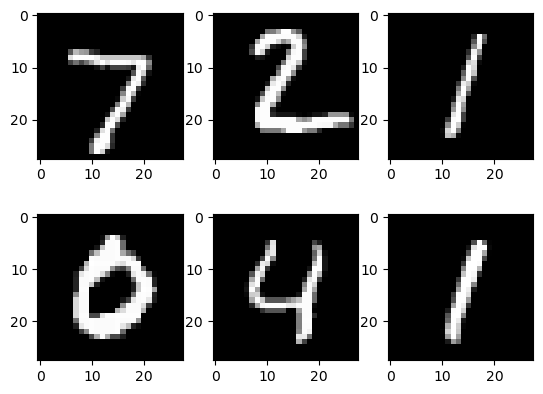

In [235]:
examples = iter(test_loader)
exapmle_data , example_targets = next(examples)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(exapmle_data[i][0], cmap='gray')
    
plt.show()

In [236]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out
model = NeuralNet(input_size,hidden_size,num_classes).to(device)

In [237]:
# loss and optimizer
criterion = nn.CrossEntropyLoss() # that why no need for the activation function
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [238]:
# training
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        # origin shape: [100,1,28,28]
        # input_layer: 784
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1/2, step 100/600, loss = 0.2541
epoch 1/2, step 200/600, loss = 0.2370
epoch 1/2, step 300/600, loss = 0.1469
epoch 1/2, step 400/600, loss = 0.2584
epoch 1/2, step 500/600, loss = 0.2223
epoch 1/2, step 600/600, loss = 0.1758
epoch 2/2, step 100/600, loss = 0.1108
epoch 2/2, step 200/600, loss = 0.1579
epoch 2/2, step 300/600, loss = 0.0593
epoch 2/2, step 400/600, loss = 0.2405
epoch 2/2, step 500/600, loss = 0.1368
epoch 2/2, step 600/600, loss = 0.0492


In [307]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)
    
    for images , labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs,1)
        n_correct += (predictions == labels).sum().item()
    acc = n_correct / n_samples
    print(f'accuracy = {acc:.4f}')

accuracy = 0.9697


**CNN**

In [344]:
import numpy as np
import torch.nn.functional as F

In [309]:
# hyper params
num_epochs = 10
batch_size = 32
learning_rate = 0.001

In [310]:
# dataset has PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
# transforms.Normalize((mean channel 1 red ,mean channel 2 green ,mean channel 3 blue),(std channel 1 red ,std channel 2 green ,std channel 3 blue))
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [338]:
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    # unnormalize
    img = img / 2 + 0.5 
    # convert to numpy because plt accept numpy array
    npimg = img.numpy() 
    # Transpose the dimensions to match the expected format for image display in matplotlib
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Files already downloaded and verified
Files already downloaded and verified


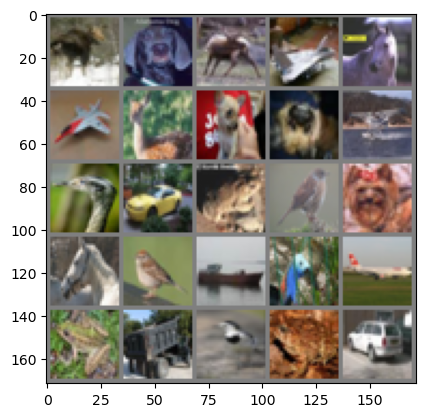

In [343]:
# one batch of random images
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[:25],nrow=5)
imshow(img_grid)

In [347]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # 3 input channels (e.g., for RGB images)
        # 32 output channels (number of filters/kernels)
        # 3x3 kernel size (spatial size of the convolutional filter)
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64 * 4 * 4, 64)
        self.fc2 = nn.Linear(64, 10)
    
    def forward(self, x):
       # N , 3,32,32
       x = F.relu(self.conv1(x)) # -> N, 32, 30, 30
       x = self.pool(x) #-> N, 32, 15, 15
       x = F.relu(self.conv2(x)) #-> N, 64, 13, 13
       x = self.pool(x)  #-> N, 64, 6, 6
       x = F.relu(self.conv3(x)) #-> N, 64, 4, 4
       x = torch.flatten(x,1) #-> N, 64*4*4
       x = F.relu(self.fc1(x)) #-> N, 64
       x = self.fc2(x) #-> N, 10
       return x
model = ConvNet().to(device)

In [348]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [349]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

epoch 1/10, step 100/1563, loss = 2.1274
epoch 1/10, step 200/1563, loss = 1.8100
epoch 1/10, step 300/1563, loss = 1.5622
epoch 1/10, step 400/1563, loss = 1.4747
epoch 1/10, step 500/1563, loss = 1.5140
epoch 1/10, step 600/1563, loss = 1.2891
epoch 1/10, step 700/1563, loss = 1.1532
epoch 1/10, step 800/1563, loss = 1.4166
epoch 1/10, step 900/1563, loss = 1.5171
epoch 1/10, step 1000/1563, loss = 1.1399
epoch 1/10, step 1100/1563, loss = 1.1934
epoch 1/10, step 1200/1563, loss = 1.3542
epoch 1/10, step 1300/1563, loss = 1.2646
epoch 1/10, step 1400/1563, loss = 1.4884
epoch 1/10, step 1500/1563, loss = 1.2166
epoch 2/10, step 100/1563, loss = 1.0741
epoch 2/10, step 200/1563, loss = 1.1804
epoch 2/10, step 300/1563, loss = 1.1227
epoch 2/10, step 400/1563, loss = 1.3532
epoch 2/10, step 500/1563, loss = 1.1429
epoch 2/10, step 600/1563, loss = 0.9850
epoch 2/10, step 700/1563, loss = 0.8235
epoch 2/10, step 800/1563, loss = 0.9756
epoch 2/10, step 900/1563, loss = 1.1074
epoch 2/10

In [351]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH)) # load the model
loaded_model.to(device)
# setting internal configuration to evaluation mode (no training)
loaded_model.eval()

with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(test_loader.dataset)
    
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        # value, index
        _, predicted = torch.max(outputs, 1)
        
        n_correct += (predicted == labels).sum().item()
        
        outputs2 = loaded_model(images)
        
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()
    print(f'Accuracy of the model: {n_correct / n_samples}')
    print(f'Accuracy of the loaded model: {n_correct2 / n_samples}')

Accuracy of the model: 0.7303
Accuracy of the loaded model: 0.7303
